# Fast Fourier Transform Example Explained

This is an example of how to set up an FFT on a signal in python.
If you like to know more about the theorie of FFT then take a look at this:
https://www.youtube.com/watch?v=spUNpyF58BY

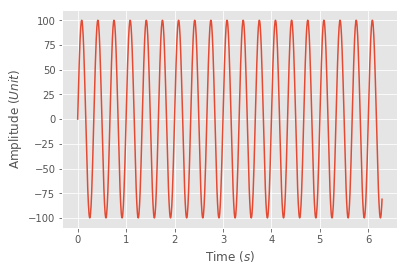

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

t = np.linspace(0, 2*np.pi, 1000, endpoint=True)
f = 3.0 # Frequency in Hz
A = 100.0 # Amplitude in Unit
s = A * np.sin(2*np.pi*f*t) # Signal

plt.plot(t,s)
plt.xlabel('Time ($s$)')
plt.ylabel('Amplitude ($Unit$)')
plt.show()

Y.size: 1000


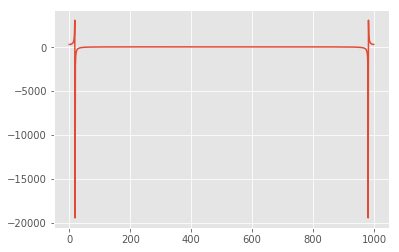

In [4]:
# Do the Discrete Fourier Transform with the Blazing Fast FFT Algorithm
Y = np.fft.fft(s)
#print(Y[0:5])
print('Y.size:',Y.size)

plt.plot(Y) #Hm, looks strange. Something, which is mirrored at the half, right?!
plt.show()

And it is something with imaginary parts (the $j$) in it. 
So let's just take the real part of it with the `abs` command.

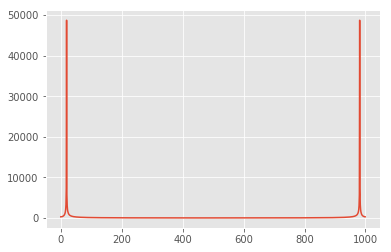

In [6]:
plt.plot(np.abs(Y)) 
plt.show()

Again, it is perfectly mirrored at the half. So let's just take the first half.
That looks pretty good. It is called the **amplitude spectrum** of the time domain signal and was calculated with the Discrete Fourier Transform with the *Chuck-Norris-Fast* FFT algorithm. 

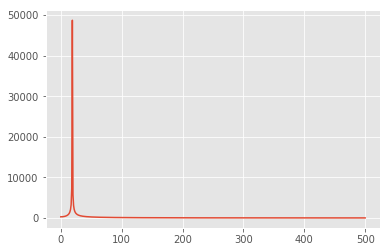

In [8]:
N = int(Y.size/2+1) #Make it an Integer
plt.plot(np.abs(Y[0:N]))
plt.show()

But how to get the x- and y-axis to real physical scaled values?!
First, let us determine the timestep, which is used to sample the signal. 
We made it synthetically, but a real signal has a period (measured every second or every day or something similar). 
If there is no constant frequency, the FFT can not be used! One can interpolate the signal to a new time base, 
but then the signal spectrum is not the original one. 
It depends on the case, if the quality is enough or if the information is getting lost with this shift keying. Enough.

In [9]:
# We have a good signal:
dt = t[1] - t[0]
fa = 1.0/dt # scan frequency
print('dt=%.5fs (Sample Time)' % dt)
print('fa=%.2fHz (Sample Frequency)' % fa)

dt=0.00629s (Sample Time)
fa=159.00Hz (Sample Frequency)


Now we need to create a x-Axis vector, which starts from $0.0$ and is filled with $N$ (length of half of the FFT signal) values and going all the way to the maximum frequency, which can be reconstructed. This frequency is half of the maximum sampling frequency ($f_a$) and is called the `Nyquist-Frequency` (see [Nyquist-Shannon Sampling Theorem](http://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem)).


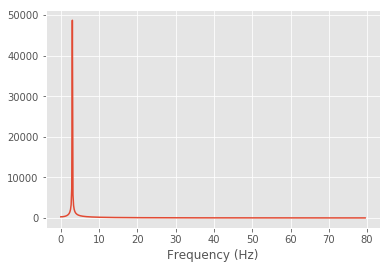

In [11]:
X = np.linspace(0, fa/2, N, endpoint=True)
#print(X[:4])

plt.plot(X, np.abs(Y[:N])) # Now let's plot the amplitude spectrum over the newly created frequency vector $X$
plt.xlabel('Frequency (Hz)')
plt.show()

Yeah! The x-Axis is showing us, that we have a peak at exactly these frequencies, from which our 
synthetically created signal was build of. 
That was the job.

This task is not this easy, because one have to understand, 
how the Fourier Transform or the Discrete Fourier Transform works in detail. 
We need to transform the y-axis value from *something* to a real physical value. 

In most implementations, the output $Y$ of the `FFT` is normalized with the number of samples. We have to divide by $N$ to get the real physical value.


But that was the easy part. The more complicated one is, if you look at the definition of the Discrete Fourier Transform:

$Y[k]=\frac{1}{N} \underbrace{\sum_{N} x(nT)\cdot e^{-i 2 \pi \frac{k}{N}n}}_{DFT}$
 
In most implementations, the output $Y$ of the `FFT` is normalized with the number of samples. We have to divide by $N$ to get the real physical value.
 
The magic factor is $\frac{2}{N}$.

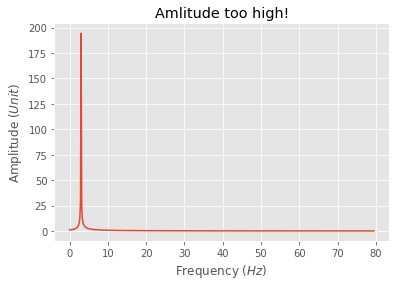

In [19]:
plt.plot(X, 2.0*np.abs(Y[:int(N)])/int(N))#output $Y$ of the `FFT` is normalized with the number of samples.
plt.xlabel('Frequency ($Hz$)')
plt.ylabel('Amplitude ($Unit$)')
plt.title('Amlitude too high!')
plt.show()

Yeah! Job accomplised. Congratulations. But wait...
The wrong Amplitude Spectrum because of Leakage Effect

If you look at the parameters for the original signal ($A$), our signal amplitude was not, what is calculated here. Why??

Take a look at the original signal.
Do you see, that the signal do not end at amplitude zero, where it started?

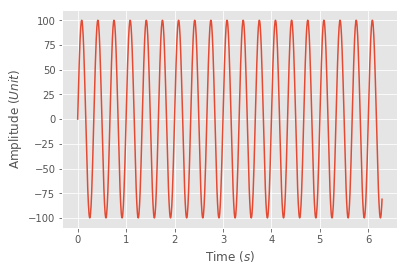

In [13]:
plt.plot(t,s)
plt.xlabel('Time ($s$)')
plt.ylabel('Amplitude ($Unit$)')
plt.show()

That means, if you add these signals up, it looks like this:

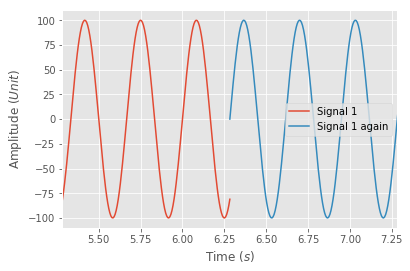

In [14]:
plt.plot(t, s, label='Signal 1')
plt.plot(t+t[-1], s, label='Signal 1 again')
plt.xlim(t[-1]-1, t[-1]+1)
plt.xlabel('Time ($s$)')
plt.ylabel('Amplitude ($Unit$)')
plt.legend()
plt.show()

The signal has to be strictly periodic, which introduces the so called **windowing** to 
eliminate the leakage effect.
Window Functions to get periodic signals from real data
There are a lot of window functions, like the *Hamming*, *Hanning*, *Blackman*, ...

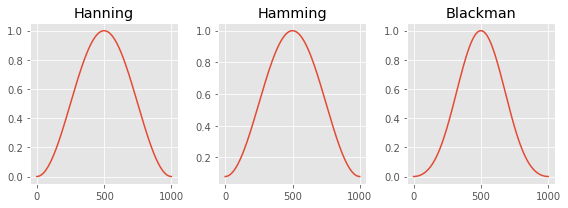

In [15]:
hann = np.hanning(len(s))
hamm = np.hamming(len(s))
black= np.blackman(len(s))

plt.figure(figsize=(8,3))
plt.subplot(131)
plt.plot(hann)
plt.title('Hanning')
plt.subplot(132)
plt.plot(hamm)
plt.title('Hamming')
plt.subplot(133)
plt.plot(black)
plt.title('Blackman')
plt.tight_layout()
plt.show()

All have different characteristics, which is an [own engineering discipline](http://en.wikipedia.org/wiki/Window_function). 
Let's take the *Hanning* window function to multiply our signal with.

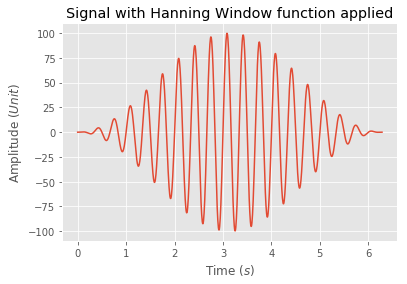

In [16]:
plt.plot(t,hann*s)
plt.xlabel('Time ($s$)')
plt.ylabel('Amplitude ($Unit$)')
plt.title('Signal with Hanning Window function applied')
plt.show()

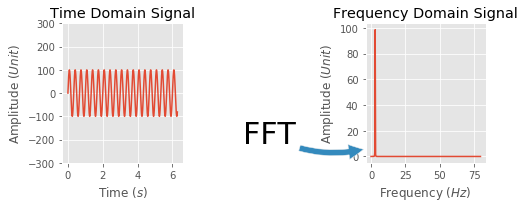

In [17]:
Yhann = np.fft.fft(hann*s)

plt.figure(figsize=(7,3))
plt.subplot(121)
plt.plot(t,s)
plt.title('Time Domain Signal')
plt.ylim(np.min(s)*3, np.max(s)*3)
plt.xlabel('Time ($s$)')
plt.ylabel('Amplitude ($Unit$)')

plt.subplot(122)
plt.plot(X, 2.0*np.abs(Yhann[:N])/N)
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency ($Hz$)')
plt.ylabel('Amplitude ($Unit$)')

plt.annotate("FFT",
            xy=(0.0, 0.1), xycoords='axes fraction',
            xytext=(-0.8, 0.2), textcoords='axes fraction',
            size=30, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=0.2"))
plt.tight_layout()

This is exactly, what we wanted to see: A beautiful amplitude spectrum of our signal, 
which was calcualted with the FFT algorithm.
And the Amplitude in the Time Domain fits the Amplitude in the Frequency Domain